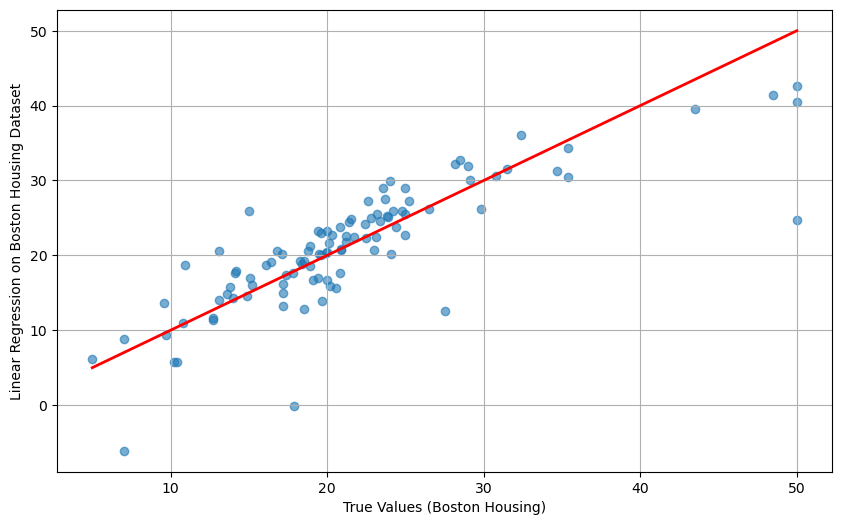

Linear Regression Results:
Mean Squared Error: 24.29
R^2 Score: 0.668759


/home/student/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


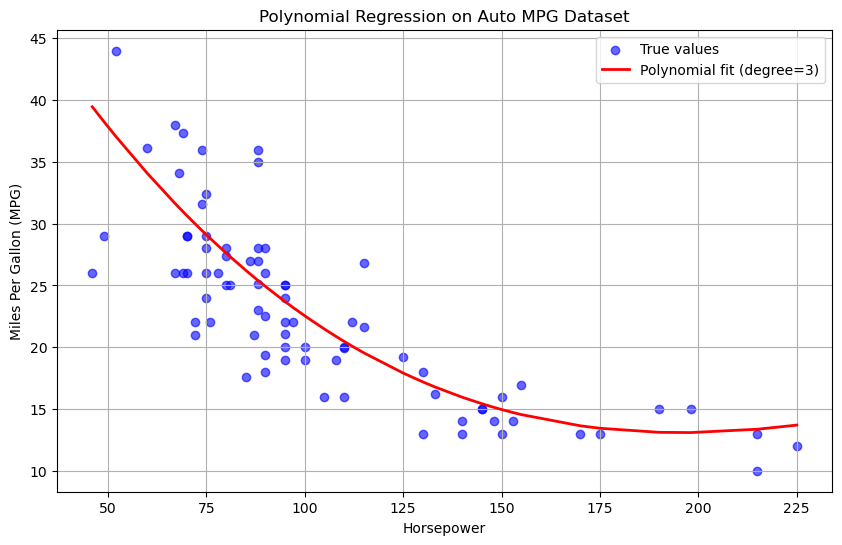

Polynomial Regression Results (Degree=3):
Mean Squared Error: 18.46
R2 Score: 0.64


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression_boston():
    boston=fetch_openml(name="boston",version=1,as_frame=True)
    X=boston.data.to_numpy()
    y=boston.target.to_numpy()
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,y_train)
    
    y_pred=lin_reg.predict(X_test)
    
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    
    plt.figure(figsize=(10,6))
    plt.scatter(y_test,y_pred,alpha=0.6)
    plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color="red",linewidth=2)
    plt.xlabel("True Values (Boston Housing)")
    plt.ylabel("Linear Regression on Boston Housing Dataset")
    plt.grid(True)
    plt.show()
    
    print(f"Linear Regression Results:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:2f}")
def polynomial_regression_auto_mpg():
    auto_mpg = fetch_openml(name="autoMpg", version=1, as_frame=True)
    data = auto_mpg.data
    target = auto_mpg.target.astype(float)  
    data = data.dropna(subset=['horsepower'])
    target = target.loc[data.index]
    X_hp = data[['horsepower']].astype(float)
    y_mpg = target
    X_train, X_test, y_train, y_test = train_test_split(X_hp, y_mpg, test_size=0.2, random_state=42)
    poly_features = PolynomialFeatures(degree=3)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y_train)
    y_pred_poly = lr_poly.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    X_test_sorted, y_test_sorted = zip(*sorted(zip(X_test.values.flatten(), y_test)))
    y_pred_sorted = lr_poly.predict(poly_features.transform(np.array(X_test_sorted).reshape(-1, 1)))
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color="blue", label="True values", alpha=0.6)
    plt.plot(X_test_sorted, y_pred_sorted, color="red", label="Polynomial fit (degree=3)", linewidth=2)
    plt.xlabel("Horsepower")
    plt.ylabel("Miles Per Gallon (MPG)")
    plt.title("Polynomial Regression on Auto MPG Dataset")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Polynomial Regression Results (Degree=3):")
    print(f"Mean Squared Error: {mse_poly:.2f}")
    print(f"R2 Score: {r2_poly:.2f}")


def run_models():
    linear_regression_boston()
    polynomial_regression_auto_mpg()

run_models()